In [8]:
import pandas as pd
import numpy as np
import preprocessing

In [9]:
#loading data
df_female = pd.read_csv('test_data2/df_female.csv')
df_age = pd.read_csv('test_data2/df_age.csv')
df_SFI = pd.read_csv('test_data2/df_SFI.csv')
df_uti = pd.read_csv('test_data2/df_uti.csv')
df_admissions = pd.read_csv('test_data2/df_admissions.csv')
df_FIM_total = pd.read_csv('test_data2/df_FIM_total.csv')
df_acute_days = pd.read_csv('test_data2/df_acute_days.csv')
df_brain_injury = pd.read_csv('test_data2/df_brain_injury_mod.csv')

#Removing extra column
df_female = df_female.loc[:, ~df_female.columns.str.contains('^Unnamed')]
df_age = df_age.loc[:, ~df_age.columns.str.contains('^Unnamed')]
df_SFI = df_SFI.loc[:, ~df_SFI.columns.str.contains('^Unnamed')]
df_uti = df_uti.loc[:, ~df_uti.columns.str.contains('^Unnamed')]
df_admissions = df_admissions.loc[:, ~df_admissions.columns.str.contains('^Unnamed')]
df_FIM_total = df_FIM_total.loc[:, ~df_FIM_total.columns.str.contains('^Unnamed')]
df_acute_days = df_acute_days.loc[:, ~df_acute_days.columns.str.contains('^Unnamed')]
df_brain_injury = df_brain_injury.loc[:, ~df_brain_injury.columns.str.contains('^Unnamed')]


#rename FIM_total to value (column-name needs to be value for timeseriesflattener)
df_FIM_total = df_FIM_total.rename(columns= {'FIM_total': 'value'})


In [10]:
#Creating uti df with negative cases as well
merged = pd.merge(df_age, df_uti, on=['ID'], how='left')

merged = merged[['ID','value']]

#turning UVI-neg cases from nan to 0
where_are_NaNs = np.isnan(merged)
merged[where_are_NaNs] = 0

#checking
print(merged)

#Changing from floats to int
merged['value'] = merged['value'].astype('int')

merged = pd.merge(merged, df_uti, on=['ID', 'value'], how='left')

print(merged)

           ID  value
0        1436    1.0
1        2056    0.0
2        2492    1.0
3        3084    0.0
4        3087    0.0
...       ...    ...
1859  8169844    0.0
1860  8267752    1.0
1861  8769379    0.0
1862  8814557    0.0
1863  8869412    0.0

[1864 rows x 2 columns]
           ID  value        date
0        1436      1  2020-08-10
1        2056      0         NaN
2        2492      1  2019-02-04
3        3084      0         NaN
4        3087      0         NaN
...       ...    ...         ...
1859  8169844      0         NaN
1860  8267752      1  2020-12-09
1861  8769379      0         NaN
1862  8814557      0         NaN
1863  8869412      0         NaN

[1864 rows x 3 columns]


In [11]:
few = 100
i=0
k=0

for ID in df_SFI['ID'].unique():
    k += 1
    df_SFI_sub = df_SFI[df_SFI['ID'] == ID]
    if len(df_SFI_sub) < few:
        i += 1
        #print(len(df_tfidfvect_train_sub))

print(f"Out of: {k} patients, {i} have fewer than {few} notes. That is {int(i/k*100)}% ")
i

Out of: 1864 patients, 1373 have fewer than 100 notes. That is 73% 


1373

In [12]:
#Important to call predictors static, dynamic or text, otherwise they will be skipped because the function will not know how to handle them!
#Make a disclaimer message if there is such a df in the predictor dict
predictor_dict = {'df_SFI_text':df_SFI, 'df_age_static':df_age, 'df_female_static':df_female, 'df_acute_days_static':df_acute_days, 'df_FIM_total_dynamic':df_FIM_total }#, 'df_brain_injury_static':df_brain_injury}  # 

In [13]:
predictor_dict_train, predictor_dict_test, y_train_df, y_test_df, df_admissions_train, df_admissions_test = preprocessing.data_split(df_outcome = merged, predictor_dict = predictor_dict, df_admissions = df_admissions, test_size = 0.3)

Number of observations in trainingset:362
Percentage of positive class in trainingset: 27.76073619631902
Number of observations in testset:156
Percentage of positive class in testset: 27.857142857142858


In [14]:
from tfidf import tf_idf

df_tfidfvect_train, df_tfidfvect_test = tf_idf(predictor_dict_train["df_SFI_text"], predictor_dict_test["df_SFI_text"], min_df = 5, max_features=200)

e:\Projekter\RHN\linapd\tfidf_hyperparamsearch.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf_hyperparamsearch.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


Tokens ['adspurgt' 'aff' 'afføring' 'aftalt' 'aften' 'aftenvagten' 'av' 'bad'
 'beder' 'behandling' 'behov' 'besøg' 'ble' 'bleen' 'bleer' 'bleskift'
 'blevet' 'blod' 'blære' 'blæren' 'blærescannet' 'brugt' 'bukseble'
 'bukser' 'bundskift' 'bundskiftet' 'bækken' 'bækkenstol' 'ca' 'dag' 'dd'
 'diurese' 'dv' 'efterfølgende' 'ej' 'evt' 'faldet' 'fik' 'fint'
 'forbindelse' 'forsøgt' 'fortsat' 'fortæller' 'fungerer' 'fået' 'får'
 'føler' 'gang' 'gange' 'gerne' 'giver' 'givet' 'godt' 'grundet' 'gul'
 'gå' 'gået' 'går' 'haft' 'held' 'hele' 'helt' 'hjælp' 'hjælpes' 'holde'
 'hvil' 'hvilket' 'ifm' 'ildelugtende' 'inden' 'kad' 'kalder' 'kateter'
 'kath' 'kl' 'klar' 'kolbe' 'kolben' 'komme' 'kommet' 'konc'
 'koncentreret' 'kort' 'lade' 'lang' 'let' 'ligger' 'lys' 'læge' 'løbet'
 'ml' 'morgen' 'muligt' 'mængde' 'mærke' 'mærker' 'mørk' 'nat' 'natten'
 'nedre' 'nitrit' 'nåede' 'når' 'obs' 'par' 'pga' 'pose' 'posen' 'positiv'
 'prøve' 'pt' 'påsat' 'relevant' 'resultat' 'ringer' 'samt' 'sat' 'scan'
 's

In [15]:
# from tfidf import tf_idf

# df_tfidfvect_train, df_tfidfvect_test = tf_idf(predictor_dict_train["df_SFI_text"], predictor_dict_test["df_SFI_text"])

# # #Bør tal-tokens slettes?

In [16]:
#from sentence_embeddings import sentence_embeddings

#df_sentence_train = sentence_embeddings(df_free_text = predictor_dict_train["df_SFI"], transformer_model = 'encoder-large-v1')

#df_sentence_test = sentence_embeddings(df_free_text = predictor_dict_test["df_SFI"], transformer_model = 'encoder-large-v1')

In [17]:
#funtionen virker ikke med FIM, why??
from preparing_specs import preparing_specs



X_final_train_tfidf, y_final_train_tfidf =  preparing_specs(embeddings = df_tfidfvect_train,
                                                predictor_dict = predictor_dict_train,
                                                prediction_times = df_admissions_train, 
                                                outcome_df = y_train_df, 
                                                embedding_type ="tfidf",
                                                lookbehind = 4, 
                                                lookahead = 3)


# X_final_train_transf, y_final_train_transf=  preparing_specs(embeddings = df_sentence_train,
#                                                 predictor_dict = predictor_dict_train,
#                                                 prediction_times = df_admissions_train, 
#                                                 outcome_df = y_train_df, 
#                                                 embedding_type ="transformer",
#                                                 lookbehind = 4, 
#                                                 lookahead = 3)


2024-03-09 09:29:24 [INFO] df_FIM_total_dynamic: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:24 [INFO] tfidfadspurgt: Converting timestamp column to datetime64[ns]


Training specs will take a while


2024-03-09 09:29:24 [INFO] tfidfaff: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:24 [INFO] tfidfafføring: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:25 [INFO] tfidfaftalt: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:25 [INFO] tfidfaften: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:25 [INFO] tfidfaftenvagten: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:26 [INFO] tfidfav: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:26 [INFO] tfidfbad: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:26 [INFO] tfidfbeder: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:26 [INFO] tfidfbehandling: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:27 [INFO] tfidfbehov: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:27 [INFO] tfidfbesøg: Converting timestamp column to datetime64[ns]
2024-03-09 09:29:27 [INFO] tfidfble: Converting timestamp

KeyboardInterrupt: 

In [ ]:
#X_final_train_tfidf_sub = X_final_train_tfidf[X_final_train_tfidf['ID'] == 4906391]

# iterating the columns
for col in X_final_train_tfidf.columns:
    print(col)


#[print(i) for i in X_final_train_tfidf_sub['pred_tfidfkateter_within_4_days_mean_fallback_nan']]

pred_tfidffortæller_within_4_days_mean_fallback_nan
pred_tfidfgå_within_4_days_mean_fallback_nan
pred_tfidfvådt_within_4_days_mean_fallback_nan
pred_tfidfbundskiftet_within_4_days_mean_fallback_nan
pred_tfidfwc_within_4_days_mean_fallback_nan
pred_tfidfkath_within_4_days_mean_fallback_nan
pred_tfidfholde_within_4_days_mean_fallback_nan
pred_tfidfurinen_within_4_days_mean_fallback_nan
pred_tfidfpåsat_within_4_days_mean_fallback_nan
pred_tfidfstor_within_4_days_mean_fallback_nan
pred_tfidfbukser_within_4_days_mean_fallback_nan
pred_tfidfvandet_within_4_days_mean_fallback_nan
pred_tfidfvagten_within_4_days_mean_fallback_nan
pred_tfidfseng_within_4_days_mean_fallback_nan
pred_tfidftrods_within_4_days_mean_fallback_nan
pred_tfidfringer_within_4_days_mean_fallback_nan
pred_tfidfsengen_within_4_days_mean_fallback_nan
pred_tfidfsidste_within_4_days_mean_fallback_nan
pred_tfidfurinpose_within_4_days_mean_fallback_nan
pred_tfidfefterfølgende_within_4_days_mean_fallback_nan
pred_tfidftoiletstol_w

In [ ]:
X_final_test_tfidf, y_final_test_tfidf =  preparing_specs(embeddings = df_tfidfvect_test,
                                                predictor_dict = predictor_dict_test,
                                                prediction_times = df_admissions_test, 
                                                outcome_df = y_test_df, 
                                                embedding_type ="tfidf",
                                                lookbehind = 4, 
                                                lookahead = 3)

In [20]:
#import optuna


In [24]:
%%capture

#VIRKER PT IKKE MED KATEGORISKE VARIABLE, TJEK OM JEG MANGLER ET STEP!



from xgboost import XGBClassifier
from sklearn.utils import class_weight
import optuna
from tfidf import tf_idf
from preparing_specs import preparing_specs
from sklearn.metrics import roc_auc_score

def objective(trial):
    min_df_trial = trial.suggest_int("min_df_trial", 4, 5) #try 4, 15
    max_df_trial = trial.suggest_float("max_df_trial", 0.90, 1.0, step = 0.02)
    max_features_trial = trial.suggest_int("max_features_trial", 200, 600, step = 100)
    ngram_range_upper_trial = trial.suggest_int("ngram_range_upper_trial", 1, 2)

    df_tfidfvect_train, df_tfidfvect_test = tf_idf(predictor_dict_train["df_SFI_text"], predictor_dict_test["df_SFI_text"], min_df = min_df_trial, max_df = max_df_trial, max_features=max_features_trial, ngram_range = (1, ngram_range_upper_trial));
    #ngram_range(1, ngram_range_upper_trial)
    
    X_final_train_tfidf, y_final_train_tfidf =  preparing_specs(embeddings = df_tfidfvect_train,
                                                predictor_dict = predictor_dict_train,
                                                prediction_times = df_admissions_train, 
                                                outcome_df = y_train_df, 
                                                embedding_type ="tfidf",
                                                lookbehind = 4, 
                                                lookahead = 3)


    X_final_test_tfidf, y_final_test_tfidf =  preparing_specs(embeddings = df_tfidfvect_test,
                                                predictor_dict = predictor_dict_test,
                                                prediction_times = df_admissions_test, 
                                                outcome_df = y_test_df, 
                                                embedding_type ="tfidf",
                                                lookbehind = 4, 
                                                lookahead = 3)



    class_weights2 = class_weight.compute_sample_weight(class_weight='balanced', y = y_final_train_tfidf['outc_outcome_within_3_days_maximum_fallback_0_dichotomous'])

    xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, enable_categorical = True, tree_method = 'hist')
    
    xgb_model.fit(X_final_train_tfidf, y_final_train_tfidf, sample_weight = class_weights2)

    cols_when_model_builds = xgb_model.get_booster().feature_names

    X_final_train_tfidf = X_final_train_tfidf[cols_when_model_builds]
    #X_final_train_tfidf[["pred_df_brain_injury_static"]] = X_final_train_tfidf[["pred_df_brain_injury_static"]].astype("category")
    #X_final_train_tfidf = X_final_train_tfidf.loc[:, X_final_train_tfidf.columns != 'pred_df_brain_injury_static']


    X_final_test_tfidf = X_final_test_tfidf[cols_when_model_builds]

    #X_final_test_tfidf[["pred_df_brain_injury_static"]] = X_final_test_tfidf[["pred_df_brain_injury_static"]].astype("category")
    #X_final_test_tfidf = X_final_test_tfidf.loc[:, X_final_test_tfidf.columns != 'pred_df_brain_injury_static']

    #Taking brain_injury out, just to check that optuna works 

    y_pred = xgb_model.predict(X_final_test_tfidf)  
    predictions = [round(value) for value in y_pred]

    y_true = []

    for i in y_final_test_tfidf['outc_outcome_within_3_days_maximum_fallback_0_dichotomous']:
        y_true.append(int(i))

    roc_auc = roc_auc_score(y_true, predictions)

    #print(f'ROC-AUC score = {roc_auc_score(y_true, predictions)}') 

    return roc_auc


study = optuna.create_study(direction = "maximize") 
study.optimize(objective, n_trials = 50) 
    
study.best_params

[I 2024-03-09 18:25:01,105] A new study created in memory with name: no-name-78cc02a0-09ae-4fb4-b142-aa5cc4fdcaad
[I 2024-03-09 18:41:26,561] Trial 0 finished with value: 0.5302895041035592 and parameters: {'min_df_trial': 4, 'max_df_trial': 0.96, 'max_features_trial': 600, 'ngram_range_upper_trial': 2}. Best is trial 0 with value: 0.5302895041035592.
[I 2024-03-09 18:52:40,598] Trial 1 finished with value: 0.5212968117159062 and parameters: {'min_df_trial': 4, 'max_df_trial': 1.0, 'max_features_trial': 400, 'ngram_range_upper_trial': 2}. Best is trial 0 with value: 0.5302895041035592.
[I 2024-03-09 19:09:08,034] Trial 2 finished with value: 0.5164978914729609 and parameters: {'min_df_trial': 5, 'max_df_trial': 1.0, 'max_features_trial': 600, 'ngram_range_upper_trial': 1}. Best is trial 0 with value: 0.5302895041035592.
[I 2024-03-09 19:23:21,391] Trial 3 finished with value: 0.5325506571517036 and parameters: {'min_df_trial': 4, 'max_df_trial': 0.96, 'max_features_trial': 500, 'ngram_

In [25]:
study.best_params 

'''#AUC-ROC = 0.5393599486762709 

{'min_df_trial': 5,
 'max_df_trial': 0.96,
 'max_features_trial': 500,
 'ngram_range_upper_trial': 1}'''

{'min_df_trial': 5,
 'max_df_trial': 0.96,
 'max_features_trial': 500,
 'ngram_range_upper_trial': 1}

In [ ]:
X_final_train_tfidf

#y_final_train_tfidf

NameError: name 'X_final_train_tfidf' is not defined

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV
from sklearn.utils import class_weight
import scipy.stats as stats


xgb_model = XGBClassifier(objective="binary:logistic", random_state=42, enable_categorical = True, tree_method = 'hist')

# model_params = {'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
#  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  'min_child_weight' : [ 1, 3, 5, 7 ],
#  'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ], 
#  'reg_alpha' :[1, 5, 10, 15, 20, 25],
#  'reg_lambda': [1, 5, 10, 15, 20, 25]
# }


model_params = {'learning_rate' : stats.uniform(0.01, 0.1),
 'max_depth' : stats.randint(3, 15),
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ], 
 'reg_alpha' :stats.uniform(1, 20),
 'reg_lambda': stats.uniform(1, 20),
 'subsample': stats.uniform(0.5, 0.5),
 'n_estimators':stats.randint(50, 200)
}

X_final_train_tfidf[["pred_df_brain_injury_static"]] = X_final_train_tfidf[["pred_df_brain_injury_static"]].astype("category")

class_weights2 = class_weight.compute_sample_weight(class_weight='balanced', y = y_final_train_tfidf['outc_outcome_within_3_days_maximum_fallback_0_dichotomous'])

# #Hyperparam search
clf = RandomizedSearchCV(xgb_model, model_params, n_iter=100, cv=10, random_state=42, n_jobs = 42, scoring = "roc_auc", verbose = 3)

clf.fit(X_final_train_tfidf, y_final_train_tfidf, sample_weight = class_weights2)

print("Best parameters set:")
clf.best_estimator_


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters set:


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02270605126518848,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=102, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [ ]:
clf.best_estimator_

clf.cv_results_

clf.best_score_ #0.63 i.e. poor discrimination between classes

best_params = clf.best_estimator_.get_params()

In [ ]:
for key, param in best_params.items():
    print(f'{key} = {param},')

objective = binary:logistic,
use_label_encoder = None,
base_score = None,
booster = None,
callbacks = None,
colsample_bylevel = None,
colsample_bynode = None,
colsample_bytree = 0.4,
early_stopping_rounds = None,
enable_categorical = True,
eval_metric = None,
feature_types = None,
gamma = 0.2,
gpu_id = None,
grow_policy = None,
importance_type = None,
interaction_constraints = None,
learning_rate = 0.02270605126518848,
max_bin = None,
max_cat_threshold = None,
max_cat_to_onehot = None,
max_delta_step = None,
max_depth = 3,
max_leaves = None,
min_child_weight = 7,
missing = nan,
monotone_constraints = None,
n_estimators = 102,
n_jobs = None,
num_parallel_tree = None,
predictor = None,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
sampling_method = None,
scale_pos_weight = None,
subsample = 0.7286325808068643,
tree_method = hist,
validate_parameters = None,
verbosity = None,


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict, RandomizedSearchCV
from sklearn.utils import class_weight
import scipy.stats as stats

# xgb_model = XGBClassifier(objective = 'binary:logistic',
# use_label_encoder = None,
# base_score = None,
# booster = None,
# callbacks = None,
# colsample_bylevel = None,
# colsample_bynode = None,
# colsample_bytree = 0.4,
# early_stopping_rounds = None,
# enable_categorical = True,
# eval_metric = None,
# feature_types = None,
# gamma = 0.2,
# gpu_id = None,
# grow_policy = None,
# importance_type = None,
# interaction_constraints = None,
# learning_rate = 0.02270605126518848,
# max_bin = None,
# max_cat_threshold = None,
# max_cat_to_onehot = None,
# max_delta_step = None,
# max_depth = 3,
# max_leaves = None,
# min_child_weight = 7,
# missing = 'nan',
# monotone_constraints = None,
# n_estimators = 102,
# n_jobs = None,
# num_parallel_tree = None,
# predictor = None,
# random_state = 42,
# reg_alpha = 6.430858316394838,
# reg_lambda = 20.305036607815396,
# sampling_method = None,
# scale_pos_weight = None,
# subsample = 0.7286325808068643,
# tree_method = 'hist',
# validate_parameters = None,
# verbosity = None,)



xgb_model = XGBClassifier(objective = 'binary:logistic',
colsample_bytree = 0.4,
enable_categorical = True,
gamma = 0.2,
learning_rate = 0.02270605126518848,
max_depth = 3,
min_child_weight = 7,
n_estimators = 102,
random_state = 42,
reg_alpha = 6.430858316394838,
reg_lambda = 20.305036607815396,
subsample = 0.7286325808068643,
tree_method = 'hist')


In [ ]:
# fit!
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#xgb_model.fit(X_final_train, y_final_train)
xgb_model.fit(X_final_train_tfidf, y_final_train_tfidf, sample_weight = class_weights2)

#Resampled
#xgb_model.fit(X_final_train_resampled, y_final_train_resampled, sample_weight = class_weights3)

# Evaluate
#print(cross_val_score(xgb_model, X_final_train, y_final_train, cv = 5, scoring = 'roc_auc'))

print(cross_val_score(xgb_model, X_final_train_tfidf, y_final_train_tfidf, cv = 5, scoring = 'roc_auc'))

#Reorder columns so they are in the correct order, otherwise I get an error 
#List of column names
cols_when_model_builds = xgb_model.get_booster().feature_names

#Reordering the columns of the dataframe 
X_final_test_tfidf = X_final_test_tfidf[cols_when_model_builds]
X_final_test_tfidf[["pred_df_brain_injury_static"]] = X_final_test_tfidf[["pred_df_brain_injury_static"]].astype("category")

#Testing on actual new data

# make predictions
y_pred = xgb_model.predict(X_final_test_tfidf)  
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_final_test_tfidf, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


[0.52458079 0.52697781 0.50861185 0.49727492 0.49714563]
Accuracy: 72.13%


In [ ]:
print(f'Accuracy: {cross_val_score(xgb_model, X_final_train_tfidf, y_final_train_tfidf, cv = 5, scoring = "accuracy")}')
print(f'ROC-AUC: {cross_val_score(xgb_model, X_final_train_tfidf, y_final_train_tfidf, cv = 5, scoring = "roc_auc")}')
print(f'F1-score: {cross_val_score(xgb_model, X_final_train_tfidf, y_final_train_tfidf, cv = 5, scoring = "f1")}') #Should be possible to change the weights of f1, so it favors recall over precision. Would be relevant in my case as it is more important to have fewer false-negatives, than false-positives (more worried about MISSING true cases than mis-diagnosing)

Accuracy: [0.99040189 0.99040189 0.99040189 0.99034576 0.99040135]
ROC-AUC: [0.52458079 0.52697781 0.50861185 0.49727492 0.49714563]
F1-score: [0. 0. 0. 0. 0.]


In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(f"True Positives: {TP}. False Positives: {FP}. True negatives: {TN}. False negatives: {FN}.")

In [ ]:
y_true = []

for i in y_final_test_tfidf['outc_outcome_within_3_days_maximum_fallback_0_dichotomous']:
    y_true.append(int(i))

In [ ]:
print(perf_measure(y_true, predictions))

from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print(f'Precision = {average_precision_score(y_true, predictions)}')
print(f'Recall = {recall_score(y_true, predictions)}')
print(f'F1 score = {f1_score(y_true, predictions)}')
print(f'ROC-AUC score = {roc_auc_score(y_true, predictions)}') #0.524 that is predictive ability is not better than random guessing



True Positives: 164. False Positives: 11068. True negatives: 28941. False negatives: 179.
Precision = 0.011417266420685314
Recall = 0.478134110787172
F1 score = 0.02833693304535637
ROC-AUC score = 0.6007481771411928


<Axes: >

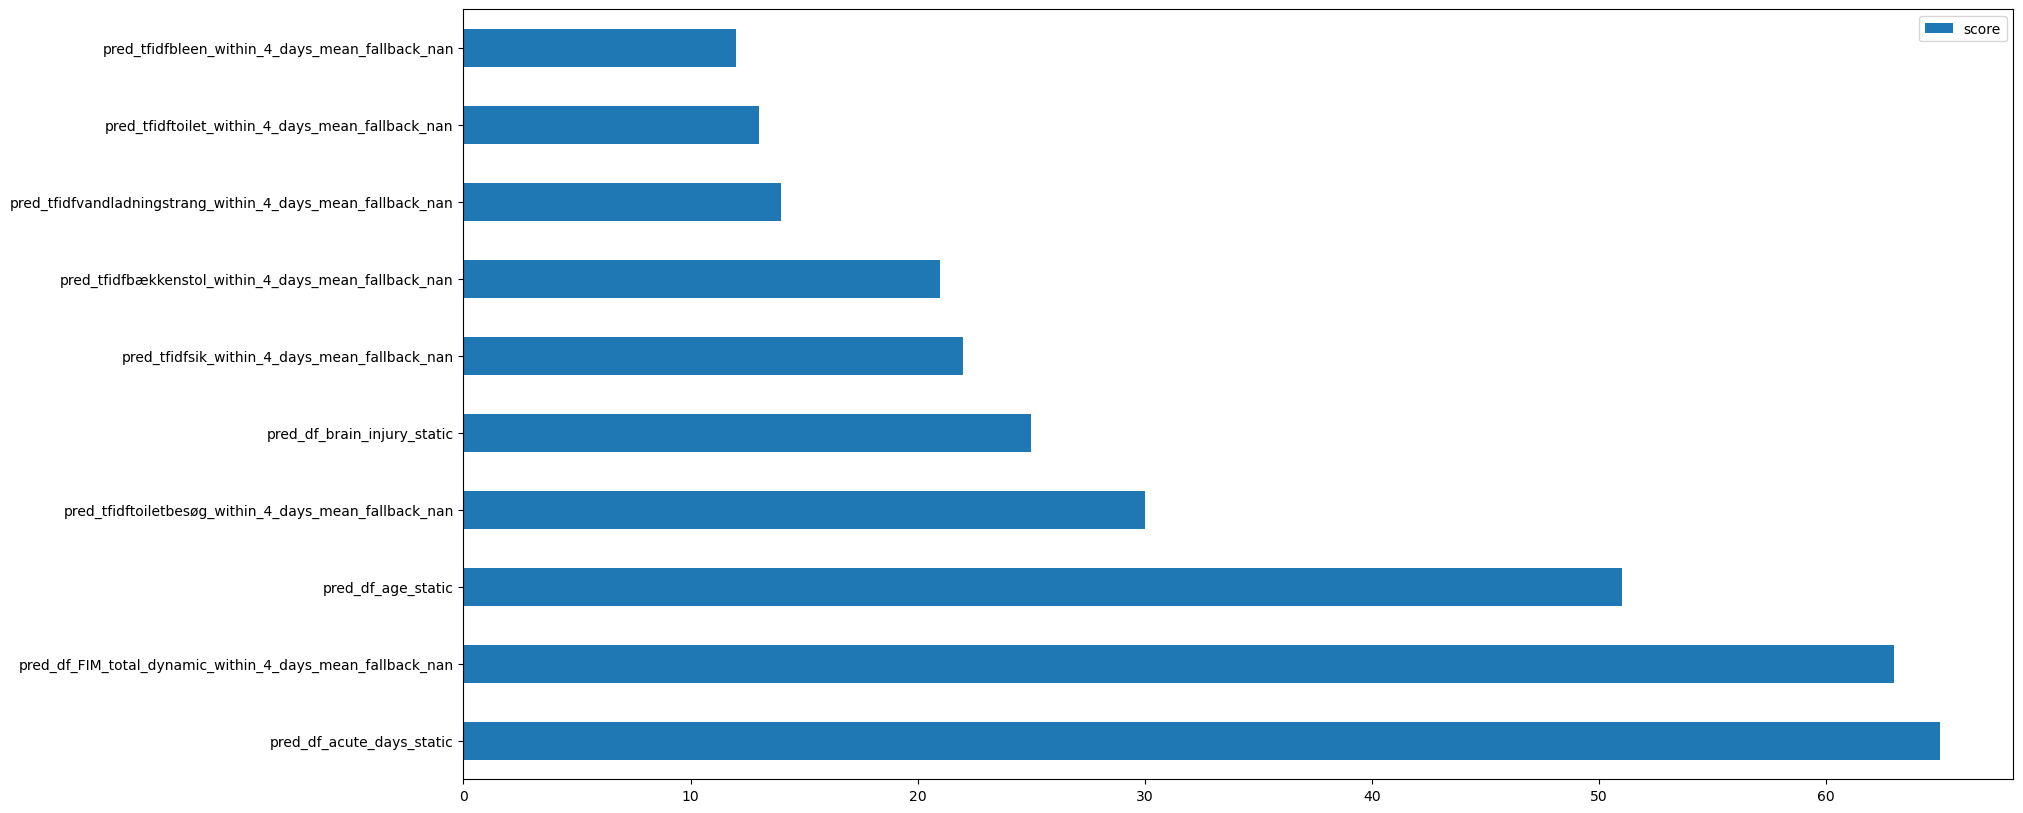

In [ ]:
feature_important = xgb_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 10 features

In [ ]:
from tfidf_LSTM import tf_idf

tfidfvect_train, tfidfvect_test = tf_idf(predictor_dict_train["df_SFI_text"], predictor_dict_test["df_SFI_text"])


e:\Projekter\RHN\linapd\tfidf_LSTM.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_SFI['note'] = X_train_SFI['note'].str.replace('\d+', '')
e:\Projekter\RHN\linapd\tfidf_LSTM.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_SFI['note'] = X_test_SFI['note'].str.replace('\d+', '')


In [ ]:
tfidfvect_train

<94140x200 sparse matrix of type '<class 'numpy.float64'>'
	with 294073 stored elements in Compressed Sparse Row format>

In [ ]:
print(*y_pred, sep=",")

In [77]:
#Makes a small subset so its easier 
df_tfidfvect_train_small = df_tfidfvect_train.iloc[0:1000,195:202]
#df_tfidfvect_train_small = df_tfidfvect_train_small.iloc[:,198:202]

In [78]:
df_tfidfvect_train_small['ID'].unique()

array([4906391,  456238, 3351724, 3106398, 2171096, 7004844, 4515724,
       3958170, 1667372, 7040320, 6076316, 2699812, 2290072, 3457338,
        347397,  503178, 2493881], dtype=int64)

In [ ]:
#IMPORTANT!!!
#Need to exclude data from after the uti happens for all participants. 
#This is done automatically in tsflattener

In [ ]:
import torch

#Finding max_length i.e. maximum amounts of notes for one patient

max_length = 0

for ID in df_tfidfvect_train['ID'].unique():
    df_tfidfvect_train_sub = df_tfidfvect_train[df_tfidfvect_train['ID'] == ID]
    if len(df_tfidfvect_train_sub) > max_length:
        max_length = len(df_tfidfvect_train_sub)
        print(max_length)


out_array = []


#Arranging df as tensors
for ID in df_tfidfvect_train['ID'].unique():
    df_tfidfvect_train_sub = df_tfidfvect_train[df_tfidfvect_train['ID'] == ID]
    df_tfidfvect_train_sub2 = df_tfidfvect_train_sub.drop(['ID','date'], axis=1)
    
    #Creating padding for the dfs that are too short
    if len(df_tfidfvect_train_sub2) < max_length:
        
        padding_length = max_length - len(df_tfidfvect_train_sub2)
        
        for i in range(padding_length):
            df_tfidfvect_train_sub2 = df_tfidfvect_train_sub2.append(pd.Series(0, index=df_tfidfvect_train_sub2.columns), ignore_index=True)
    
    array_pr_ID = []

    #Iterating over each row of ID-specific-df
    for index, row in df_tfidfvect_train_sub2.iterrows():
        value_list = []
        #get every value in row and append to list 
        for key, value in row.items():
            value_list.append(value)
        #append the list of all values to array
        array_pr_ID.append(value_list)

        #when all all data for one ID has been appended the ID_specifc_array append that to out_array
        if len(array_pr_ID) == len(df_tfidfvect_train_sub2):
            out_array.append(array_pr_ID)

#Make out_array a tensor(possible now because of the padding)
out_array = torch.Tensor(out_array)

print(out_array)



#padded_arrays = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in out_array]


#[print(arr) for arr in padded_arrays]

        #T = torch.stack((T,tensor_temp), 0)
        # array.append(tensor_temp)
#print(last_out)
    



#df_tfidfvect_train_sub = df_tfidfvect_train[df_tfidfvect_train['ID'] == 4906391]

In [87]:

print(out_array.size()) #(1304, 597, 200) (#patients, #notes, #embedding_size)

# counting unique values
len(pd.unique(df_tfidfvect_train['ID']))



torch.Size([1304, 597, 200])


1304

In [ ]:
batchsize = 100
hidden_size = 128
num_layers = 2

In [ ]:
from LSTM_Ross import RNN

my_LSTM = RNN()

